In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
from google.colab import drive
import os

drive.mount('/content/drive/')
os.chdir("/content/drive/MyDrive/Colab Notebooks")

Mounted at /content/drive/


In [6]:
df = pd.read_json('tesco_socialm.json')
df

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,matching_rules,possibly_sensitive,extended_tweet,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,scopes
0,2020-10-09 12:46:48,1314547865662951427,1314547865662951424,@JourneyStoma @Tesco That’s awesome! I want on...,"[21, 52]","<a href=""http://twitter.com/download/iphone"" r...",False,1.314314e+18,1.314314e+18,1.232803e+18,...,[{'tag': None}],NaN,None,None,NaN,NaN,None,None,None,NaN
1,2020-04-21 13:03:54,1252583841824456709,1252583841824456709,"@Tesco Thanks Ben, you're doing a great job ☺️♥️","[7, 48]","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,1.252584e+18,1.252584e+18,2.719861e+08,...,[{'tag': None}],NaN,None,None,NaN,NaN,None,None,None,NaN
2,2020-11-30 12:26:19,1333386877974556673,1333386877974556672,WHO WILL WIN?\n@researchlive UK Business Impac...,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.333387e+18,1.333387e+18,1.304432e+08,...,[{'tag': None}],0.0,{'full_text': 'WHO WILL WIN? @researchlive UK ...,None,NaN,NaN,None,None,None,NaN
3,2020-04-16 19:07:30,1250863404694175745,1250863404694175745,@Cilvrnum @Tesco @asda @Ocado Never even seen ...,"[30, 62]","<a href=""http://twitter.com/download/iphone"" r...",False,1.250857e+18,1.250857e+18,5.974244e+08,...,[{'tag': None}],NaN,None,None,NaN,NaN,None,None,None,NaN
4,2020-12-22 11:34:32,1341346379478740993,1341346379478740992,Any comment @Tesco ? British carrots proudly d...,"[0, 98]","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,[{'tag': None}],1.0,None,None,NaN,NaN,None,None,"{'media': [{'id': 1341346375934611461, 'id_str...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96697,2020-03-31 10:38:26,1244937086974779392,1244937086974779392,"RT @Tesco: From suppliers to colleagues, and e...",None,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,[{'tag': None}],NaN,None,{'created_at': 'Tue Mar 31 10:11:52 +0000 2020...,NaN,NaN,None,None,None,NaN
96698,2020-12-22 09:54:47,1341321276833599493,1341321276833599488,RT @DCBMEP: I would like an explanation too @T...,None,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,[{'tag': None}],NaN,None,{'created_at': 'Mon Dec 21 17:16:42 +0000 2020...,1.341034e+18,1.341034e+18,{'created_at': 'Mon Dec 21 14:53:14 +0000 2020...,"{'url': 'https://t.co/JXvQZwpSU7', 'expanded':...",None,NaN
96699,2020-03-15 17:34:33,1239243602519379969,1239243602519379969,@MichelleOwen7 @Tesco Robbing bastards. Can't ...,"[22, 108]","<a href=""http://twitter.com/download/android"" ...",False,1.239223e+18,1.239223e+18,3.585861e+07,...,[{'tag': None}],NaN,None,None,NaN,NaN,None,None,None,NaN
96700,2020-11-12 15:47:46,1326914592346431489,1326914592346431488,@fishyberty @ppe_sale @MarcherLord1 @petuniasf...,"[68, 116]","<a href=""http://twitter.com/download/android"" ...",False,1.326857e+18,1.326857e+18,1.242717e+18,...,[{'tag': None}],NaN,None,None,NaN,NaN,None,None,None,NaN


In [7]:
print ('The length of the dataset is %s'%len(df))
print ('The begining date of the dataset is %s'%(str(min(df['created_at']))))
print ('The ending date of the dataset is %s'%(str(max(df['created_at']))))
print ("There are %s columns in this dataset"%(len(df.columns.values)))
df.columns.values

The length of the dataset is 96702
The begining date of the dataset is 2020-01-01 00:41:07
The ending date of the dataset is 2020-12-30 23:58:24
There are 37 columns in this dataset


array(['created_at', 'id', 'id_str', 'text', 'display_text_range',
       'source', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user',
       'geo', 'coordinates', 'place', 'contributors', 'is_quote_status',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
       'entities', 'favorited', 'retweeted', 'filter_level', 'lang',
       'matching_rules', 'possibly_sensitive', 'extended_tweet',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'quoted_status_permalink', 'extended_entities',
       'scopes'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96702 entries, 0 to 96701
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   created_at                 96702 non-null  datetime64[ns]
 1   id                         96702 non-null  int64         
 2   id_str                     96702 non-null  int64         
 3   text                       96702 non-null  object        
 4   display_text_range         46972 non-null  object        
 5   source                     96697 non-null  object        
 6   truncated                  96702 non-null  bool          
 7   in_reply_to_status_id      39415 non-null  float64       
 8   in_reply_to_status_id_str  39415 non-null  float64       
 9   in_reply_to_user_id        49910 non-null  float64       
 10  in_reply_to_user_id_str    49910 non-null  float64       
 11  in_reply_to_screen_name    49113 non-null  object        
 12  user     

In [9]:
df.isnull().sum()

created_at                       0
id                               0
id_str                           0
text                             0
display_text_range           49730
source                           5
truncated                        0
in_reply_to_status_id        57287
in_reply_to_status_id_str    57287
in_reply_to_user_id          46792
in_reply_to_user_id_str      46792
in_reply_to_screen_name      47589
user                             0
geo                          96589
coordinates                  96589
place                        93840
contributors                 96702
is_quote_status                  0
quote_count                      0
reply_count                      0
retweet_count                    0
favorite_count                   0
entities                         0
favorited                        0
retweeted                        0
filter_level                     0
lang                             0
matching_rules                   0
possibly_sensitive  

In [10]:
df.columns

Index(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted',
       'filter_level', 'lang', 'matching_rules', 'possibly_sensitive',
       'extended_tweet', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink',
       'extended_entities', 'scopes'],
      dtype='object')

In [11]:
#dropping columns
text_df = df.drop(['created_at', 'id', 'id_str','display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted',
       'filter_level', 'lang', 'matching_rules', 'possibly_sensitive',
       'extended_tweet', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink',
       'extended_entities', 'scopes'], axis=1)
text_df.head()

,text
0,@JourneyStoma @Tesco That’s awesome! I want on...
1,"@Tesco Thanks Ben, you're doing a great job ☺️♥️"
2,WHO WILL WIN?\n@researchlive UK Business Impac...
3,@Cilvrnum @Tesco @asda @Ocado Never even seen ...
4,Any comment @Tesco ? British carrots proudly d...


In [12]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

@JourneyStoma @Tesco That’s awesome! I want one too! 

@Tesco Thanks Ben, you're doing a great job ☺️♥️ 

WHO WILL WIN?
@researchlive UK Business Impact of the Year, sponsored by @TheMarketingSoc:
⭐️ @FA
⭐️ @networkrail &amp;… https://t.co/mHqf6Urrwd 

@Cilvrnum @Tesco @asda @Ocado Never even seen or heard of this 

Any comment @Tesco ? British carrots proudly displaying the union flag grown in Spain? #Fraudulent https://t.co/miwKoWY6pc 



In [13]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96702 entries, 0 to 96701
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    96702 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


**PRE-PROCESSING DATASET**

In [14]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'[0-9]+', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [15]:
nltk.download('punkt')
text_df.text = text_df['text'].apply(data_processing)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
text_df = text_df.drop_duplicates('text')

In [17]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [18]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [19]:
text_df.head()

,text
0,journeystoma tesco thats awesome want one
1,tesco thanks ben youre great job
2,win researchlive uk business impact year spons...
3,cilvrnum tesco asda ocado never even seen heard
4,comment tesco british carrots proudly displayi...


In [20]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

journeystoma tesco thats awesome want one 

tesco thanks ben youre great job 

win researchlive uk business impact year sponsored themarketingsoc fa networkrail amp 

cilvrnum tesco asda ocado never even seen heard 

comment tesco british carrots proudly displaying union flag grown spain fraudulent 



In [21]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69213 entries, 0 to 96700
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    69213 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


**SENTIMENT ANALYSIS**

In [22]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


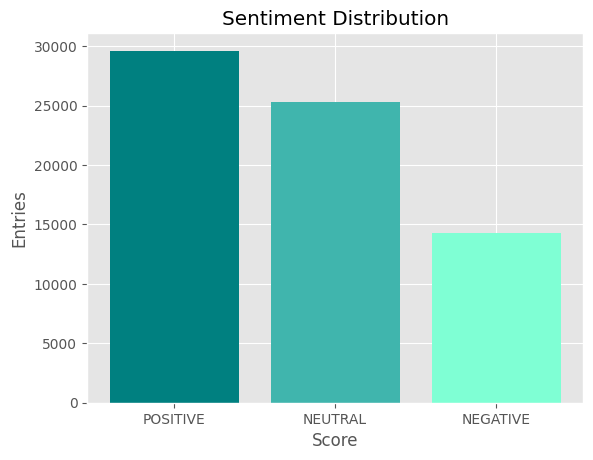

sentiment
POSITIVE    29615
NEUTRAL     25295
NEGATIVE    14303
Name: count, dtype: int64


In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

def predict_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score > 0.01:
        return 'POSITIVE'
    elif score < -0.01:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

# Applying sentiment analysis to a DataFrame
text_df['sentiment'] = text_df['text'].apply(predict_sentiment)
sentiment_counts = text_df['sentiment'].value_counts()

# Plotting the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['#008080', '#40B5AD', '#7FFFD4'])
plt.xlabel('Score')
plt.ylabel('Entries')
plt.title('Sentiment Distribution')
plt.show()
print(sentiment_counts)

In [24]:
text_df.head(10)

,text,sentiment
0,journeystoma tesco thats awesome want one,POSITIVE
1,tesco thanks ben youre great job,POSITIVE
2,win researchlive uk business impact year spons...,POSITIVE
3,cilvrnum tesco asda ocado never even seen heard,NEUTRAL
4,comment tesco british carrots proudly displayi...,POSITIVE
5,rt hardycaprio hard say racism isnt dead tesco...,NEGATIVE
6,weaning week awards winner best retailer amazo...,POSITIVE
7,umm tesco bought jam filled doughnuts eating o...,NEUTRAL
8,rt thatginamiller today begins committe stage ...,POSITIVE
9,go history wildest tesco substitution ever ord...,NEUTRAL


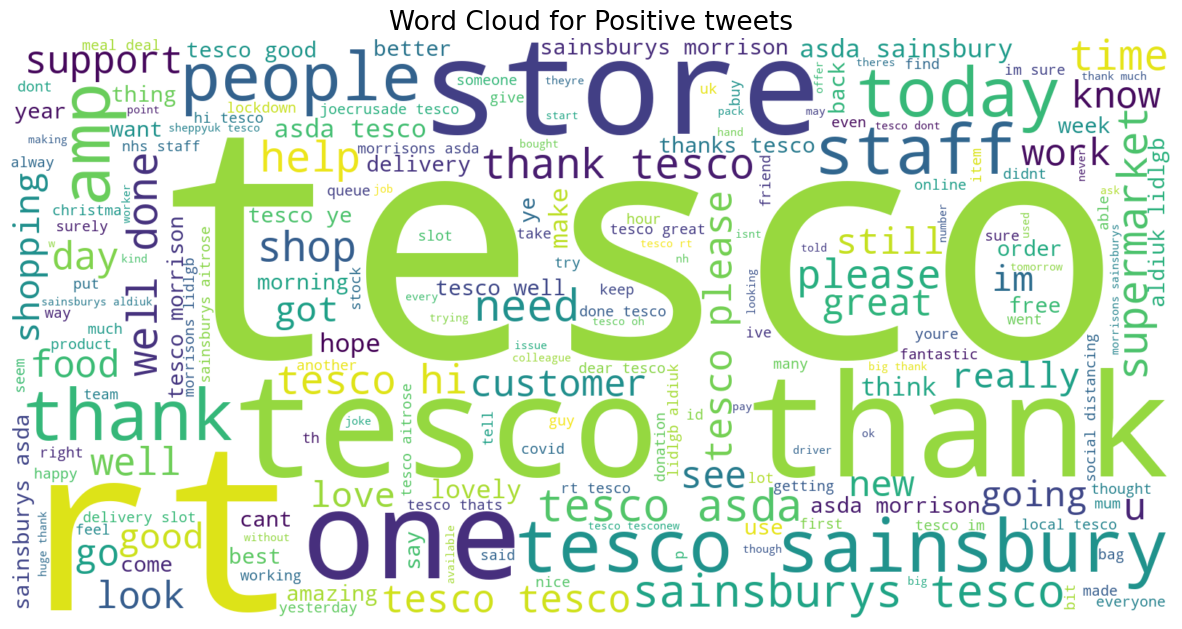

In [25]:
#plotting word cloud for positive word
positive_text = ' '.join(text_df[text_df['sentiment'] == 'POSITIVE']['text'])
plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=1600, height=800,background_color='white',stopwords = None, min_font_size = 10).generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Positive tweets', fontsize=19)
plt.show()

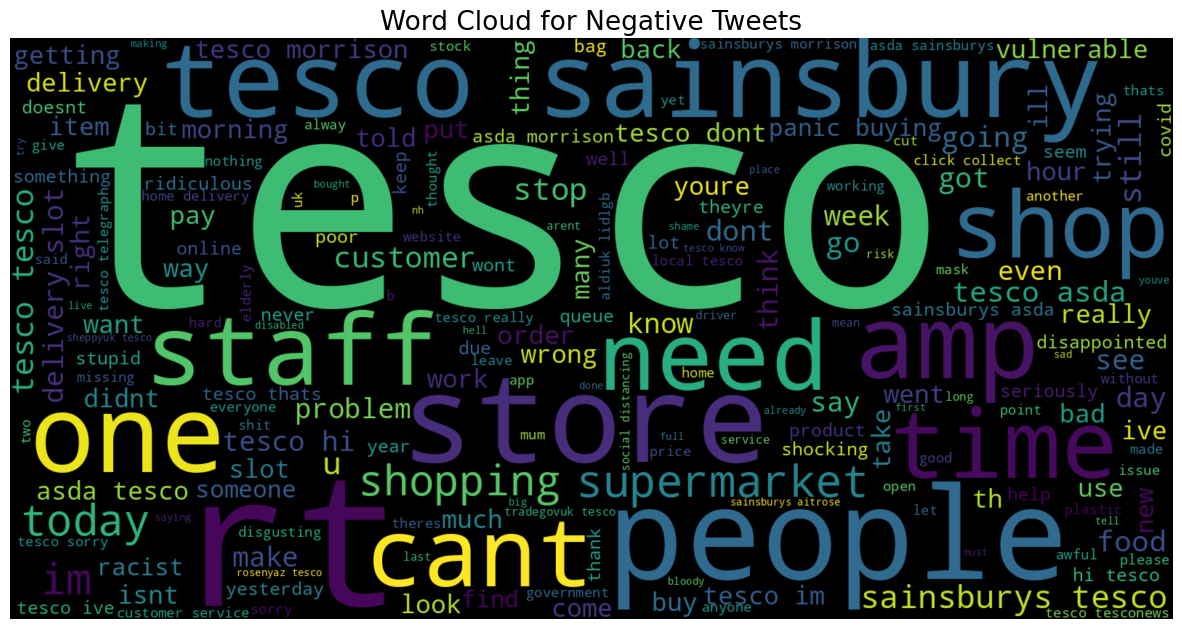

In [26]:
#plotting word cloud for ngative word
negative_text = ' '.join(text_df[text_df['sentiment'] == 'NEGATIVE']['text'])
plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=1600, height=800,background_color='black',stopwords = None, min_font_size = 10).generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Negative Tweets', fontsize=19)
plt.show()

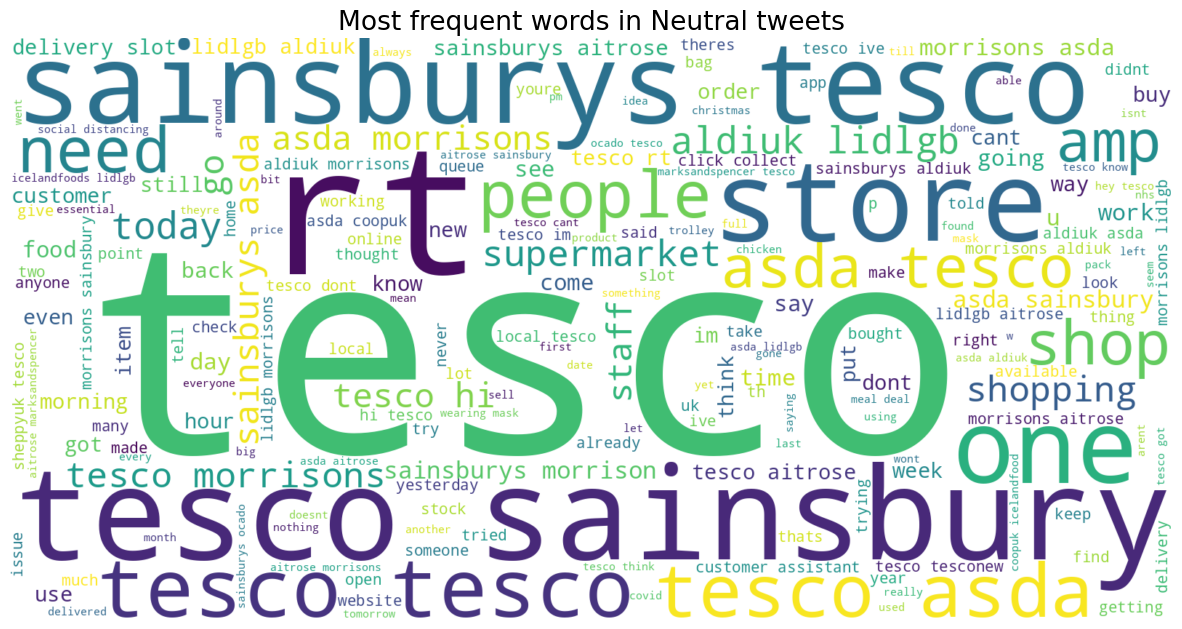

In [27]:
#plotting word cloud for neutral word
neutral_text = ' '.join(text_df[text_df['sentiment'] == 'NEUTRAL']['text'])
plt.figure(figsize=(15,10), facecolor='None')
wordcloud = WordCloud(width=1600, height=800,background_color='white',stopwords = None, min_font_size = 10).generate(neutral_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Neutral tweets', fontsize=19)
plt.show()

**LDA**

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [29]:
stopwords = stopwords.words('english')

#Using stopwords in the CountVectorizer
bow_vector = CountVectorizer(stop_words=stopwords, lowercase=True, max_df=0.5, min_df=10)
x = bow_vector.fit_transform(text_df['text'])


In [30]:
lda_bow  = LDA(n_components=6, random_state=42)
lda_bow.fit(x)

LatentDirichletAllocation(n_components=6, random_state=42)

In [31]:
lda_bow.transform(x[:2])

array([[0.03346343, 0.83248081, 0.03341805, 0.03344512, 0.03371301,
        0.03347959],
       [0.02785206, 0.02810569, 0.02783288, 0.02783867, 0.86026698,
        0.02810371]])

In [32]:
for topics, topic in enumerate(lda_bow.components_):
    print(f"Top 10 words in Topic #{topics}:")
    print([bow_vector.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('')

Top 10 words in Topic #0:
['im', 'shopping', 'shop', 'rt', 'slots', 'slot', 'online', 'cant', 'get', 'delivery']

Top 10 words in Topic #1:
['would', 'good', 'think', 'thats', 'know', 'people', 'im', 'like', 'dont', 'rt']

Top 10 words in Topic #2:
['ocado', 'coopuk', 'marksandspencer', 'rt', 'lidlgb', 'aitrose', 'aldiuk', 'morrisons', 'asda', 'sainsburys']

Top 10 words in Topic #3:
['griffjane', 'russellmoxham', 'ildlingrocks', 'vanessafiji', 'coolrunning', 'chunhuams', 'eaniejeanie', 'vanillaismd', 'exposelies', 'rt']

Top 10 words in Topic #4:
['one', 'done', 'people', 'nhs', 'today', 'well', 'store', 'thank', 'staff', 'rt']

Top 10 words in Topic #5:
['help', 'one', 'thank', 'get', 'please', 'got', 'ive', 'rt', 'hi', 'thanks']



<ipython-input-33-f5f2ebc0ba55>:21: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=1) #Adjusting spacing between subplots


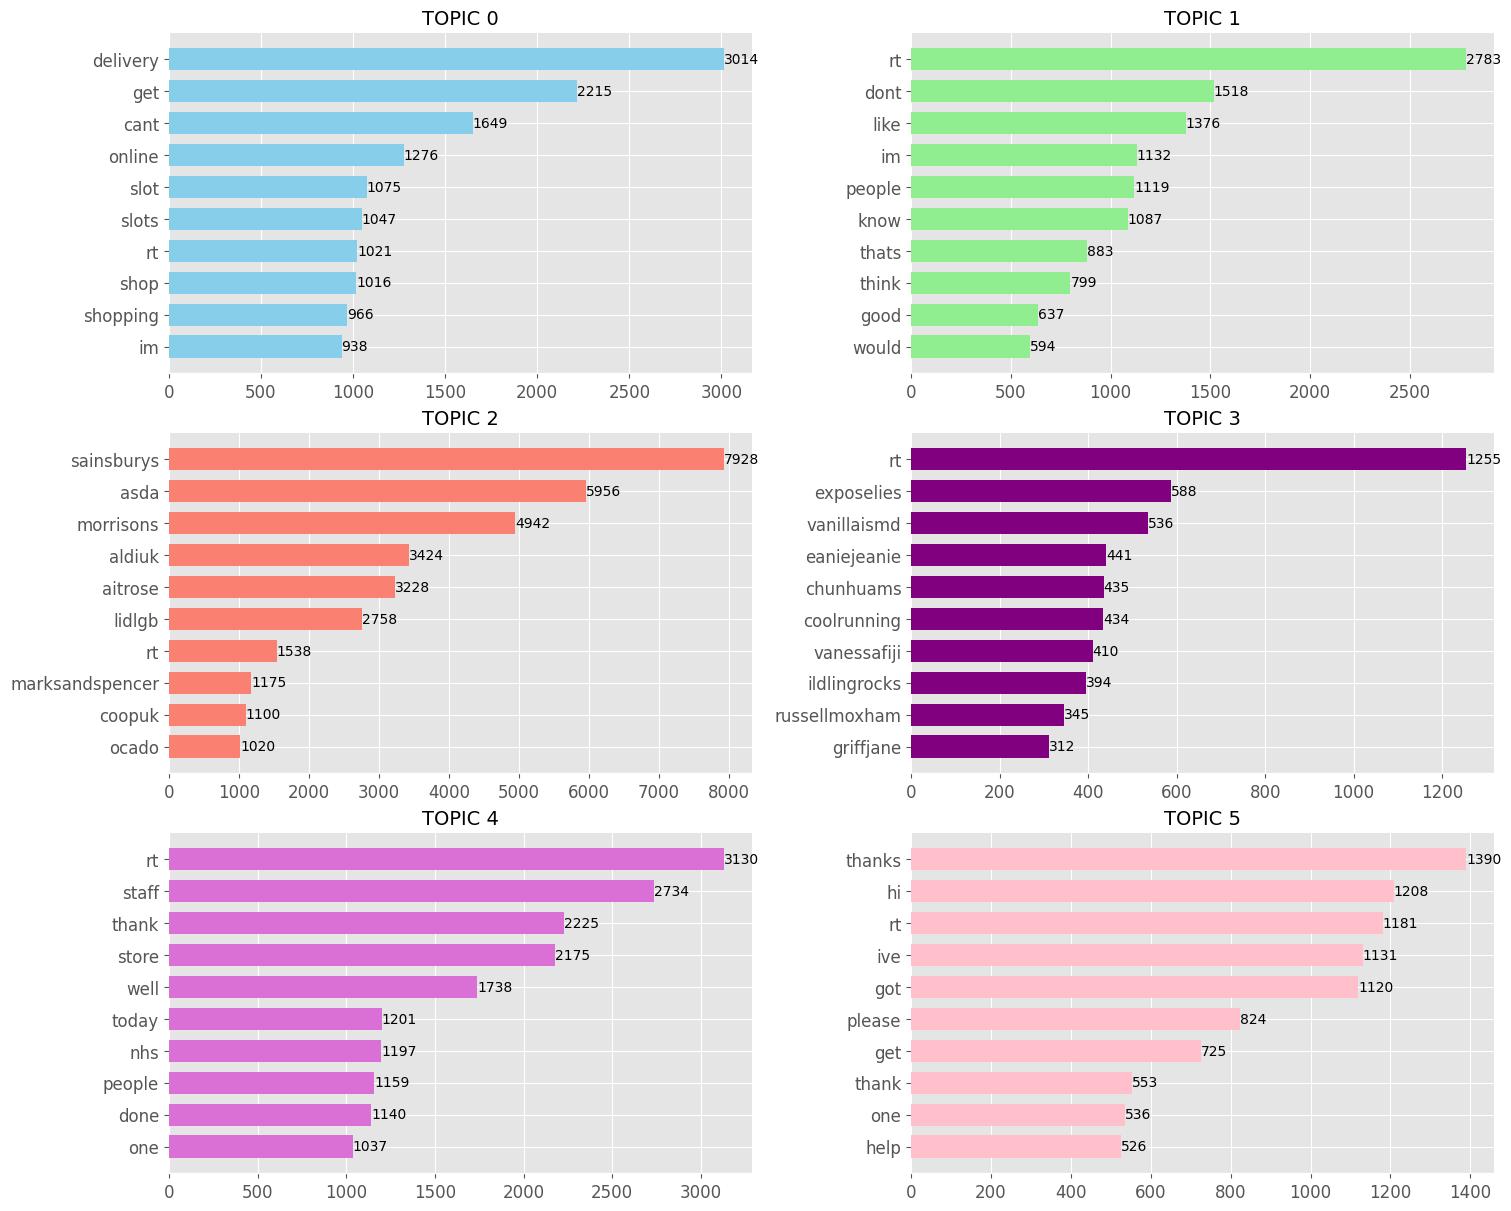

In [33]:
# Function to plot top words in each topic using bar charts
def plot_top_words(lda_model, feature_names, n_words=10, bar_colors=None):
    n_topics = len(lda_model.components_)
    nrows = (n_topics + 1) // 2  # Determining number of rows for subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 4 * nrows), constrained_layout=True, facecolor='white')
    axes = axes.flatten()
    if bar_colors is None:
        bar_colors = ['skyblue'] * n_topics #choosing default color
    for topic_topics, topic in enumerate(lda_model.components_):
        if topic_topics < n_topics:
            top_features_ind = topic.argsort()[:-n_words - 1:-1]  #Getting indices of the top words in the topic based on their weights
            top_features = [feature_names[i] for i in top_features_ind] #Getting the actual words corresponding to the top indices
            top_weights = topic[top_features_ind] #weights of the top words
            ax = axes[topic_topics]
            ax.barh(top_features, top_weights, height=0.7, color=bar_colors[topic_topics]) #horizontal bar chart for the top words in the topic
            ax.set_title(f'TOPIC {topic_topics}', fontdict={'fontsize': 14})
            ax.invert_yaxis()   # Inverting y-axis to display highest weight words at the top
            ax.tick_params(axis='both', which='major', labelsize=12) #Tick marks are the small lines that show the scale of x- and y-axes.
            for i in 'top right left'.split():
                ax.spines[i].set_visible(False)  # Removeing spines from the plot
            fig.subplots_adjust(hspace=1) #Adjusting spacing between subplots

            for i, (word, weight) in enumerate(zip(top_features, top_weights)): #text annotations for each word weight
                rounded_weight = round(weight)
                ax.text(weight, i, f'{rounded_weight}', ha='left', va='center', fontsize=10, color='black') #text annotation to the plot
    plt.show()

bar_colors = ['skyblue', 'lightgreen', 'salmon', 'purple', 'orchid', 'pink'] #custom bar colors for each topic
plot_top_words(lda_bow, bow_vector.get_feature_names_out(), bar_colors=bar_colors)


**ENGAGEMENT ANALYSIS**

In [34]:
#dropping selected columns for engagement analysis
engagement_df = df.drop(['created_at','id_str','display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'quote_count', 'entities', 'favorited', 'retweeted',
       'filter_level', 'lang', 'matching_rules', 'possibly_sensitive',
       'extended_tweet', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink',
       'extended_entities', 'scopes'], axis=1)
engagement_df.head()

,id,text,reply_count,retweet_count,favorite_count
0,1314547865662951427,@JourneyStoma @Tesco That’s awesome! I want on...,0,0,0
1,1252583841824456709,"@Tesco Thanks Ben, you're doing a great job ☺️♥️",1,0,0
2,1333386877974556673,WHO WILL WIN?\n@researchlive UK Business Impac...,1,2,9
3,1250863404694175745,@Cilvrnum @Tesco @asda @Ocado Never even seen ...,1,0,1
4,1341346379478740993,Any comment @Tesco ? British carrots proudly d...,0,2,6


In [35]:
#removing duplicates
engagement_df = engagement_df.drop_duplicates()

In [36]:
#adding columns for total engagement
columns_to_add = ['reply_count', 'retweet_count', 'favorite_count']

# Merge df1 with selected columns from df2
merged_df = pd.merge(text_df, engagement_df[columns_to_add], left_index=True, right_index=True)
print(merged_df)

                                                    text sentiment  \
0              journeystoma tesco thats awesome want one  POSITIVE   
1                       tesco thanks ben youre great job  POSITIVE   
2      win researchlive uk business impact year spons...  POSITIVE   
3        cilvrnum tesco asda ocado never even seen heard   NEUTRAL   
4      comment tesco british carrots proudly displayi...  POSITIVE   
...                                                  ...       ...   
96694  rt stephen_boxall dear tesco whilst deliveries...  POSITIVE   
96695  also endlowpay parents tesco lidlgb sainsburys...   NEUTRAL   
96696               tesco day breakfast twix iced coffee   NEUTRAL   
96699  michelleowen tesco robbing bastards cant stand...  NEGATIVE   
96700  fishyberty ppe_sale marcherlord petuniasforeve...  POSITIVE   

       reply_count  retweet_count  favorite_count  
0                0              0               0  
1                1              0               0  
2  

In [37]:
merged_df['total_engagement'] = merged_df['reply_count'] + merged_df['retweet_count'] + merged_df['favorite_count']

In [38]:
merged_df_sorted_by_engagement = merged_df.sort_values(by='total_engagement', ascending=False)

#top 10 tweets by total engagement
top_10_tweets_by_engagement = merged_df_sorted_by_engagement[['text','total_engagement','sentiment']].head(10)
print("Top 10 tweets by total engagement:")
print(top_10_tweets_by_engagement)



Top 10 tweets by total engagement:
                                                    text  total_engagement  \
72251  six weeks ago excited find tesco delivery slot...             13621   
10705  lovely visit tesco today elderly ladies giving...              9029   
77     thread visited tesco ashford park farm checkou...              7892   
52058  matter people sweet daughter came back hr shif...              7873   
64969  right move tesco call supermarket giants follo...              2806   
64537  sheppyuk tesco feel really sad people replying...              2636   
11253  tesco haha good lee need decide family member ...              2317   
8511   asked asked go home told couldnt saturday tesc...              1622   
38170                                     tesco dms open              1533   
6151   tesco lot people upset theyve released plaster...              1385   

      sentiment  
72251  POSITIVE  
10705  POSITIVE  
77     POSITIVE  
52058  POSITIVE  
64969   NEUTRAL 

In [39]:
# Filtering the merged DataFrame to only include the top 10 tweets by total engagement
top_10_tweets = merged_df_sorted_by_engagement.head(10)

# Calculating the count of sentiment for the top 10 tweets
sentiment_counts_top_10 = top_10_tweets['sentiment'].value_counts()

# Displaying the count of sentiment for the top 10 tweets
print("Count of Sentiment for Top 10 Tweets:")
print(sentiment_counts_top_10)


Count of Sentiment for Top 10 Tweets:
sentiment
POSITIVE    5
NEUTRAL     3
NEGATIVE    2
Name: count, dtype: int64


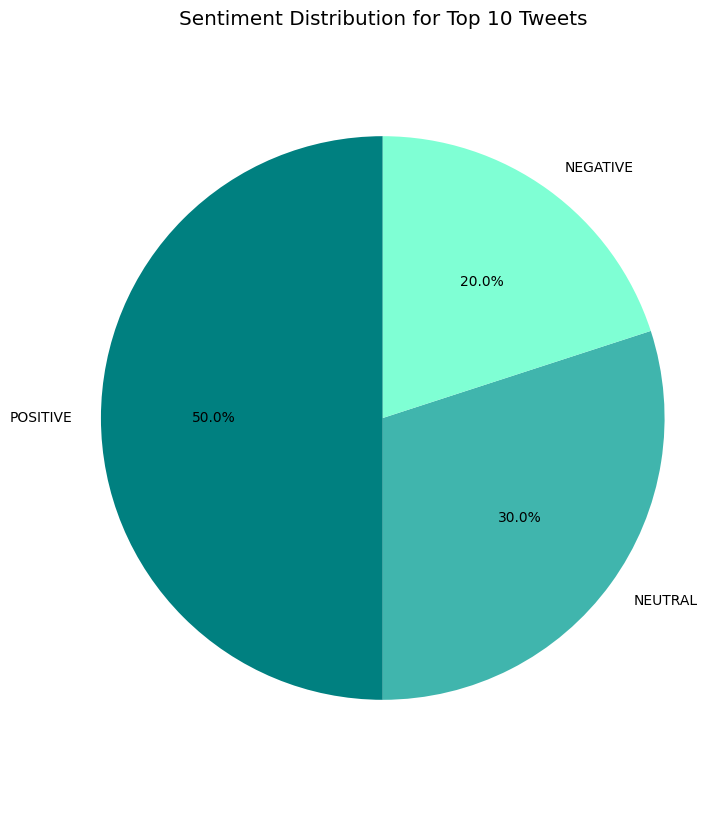

In [40]:
#Sentiment Analysis for top 10 engagement tweets
plt.figure(figsize=(8, 10))
plt.pie(sentiment_counts_top_10, labels=sentiment_counts_top_10.index, autopct='%1.1f%%', startangle=90,colors=["#008080", "#40B5AD", "#7FFFD4"])
plt.title('Sentiment Distribution for Top 10 Tweets')
plt.axis('equal')
plt.show()
